In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
n = 20 # number of data points
slope = 1.5 # randomly chosen truth
intercept = 2.5

In [ ]:
rnd = np.random.RandomState(seed = 42)

x = rnd.uniform(0, 2., n)
x.sort()
y = slope*x + intercept # y = mx + c

In [ ]:
y_err = rnd.uniform(0.1, 0.2, size = n)
y_new = rnd.normal(y, y_err)

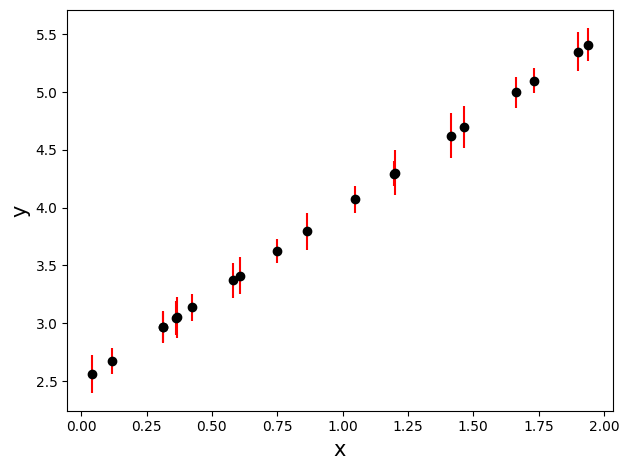

In [ ]:
plt.errorbar(x, y, y_err, linestyle = 'none' , marker = 'o', color = 'k', ecolor = 'red')
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.tight_layout()

### Bayes' Rule

One of the fundamental rules of conditional probability is this:

$$\text{P}(\text{A}|\text{B}, I) \equiv \frac{\text{P}(\text{A}, \text{B}|I)}{\text{P}(\text{B}|I)}$$

Or, rewriting this, we have the expression:

$$\text{P}(\text{A}, \text{B}|I) = \text{P}(\text{A}|\text{B}, I) \, \text{P}(\text{B}| I)$$

The above expression is symmetric so we could also write:

$$\text{P}(\text{A}, \text{B}| I) = \text{P}(\text{B} |\text{A}, I) \, \text{P}(\text{A} |I)$$

Putting these last two together, we see

$$\text{P}(\text{A}|\text{B}, I) \, \text{P}(\text{B}|I) = \text{P}(\text{B}|\text{A}, I) \, \text{P}(\text{A}| I)$$


$$\text{P}(\text{A}|\text{B}, I) = \frac{\text{P}(\text{B}|\text{A}, I) \, \text{P}(\text{A}|I)}{\text{P}(\text{B}|I)}$$

This above relation is known as *Bayes' Rule* or *Bayes' Theorem*.

### Four Terms in Bayes' Rule

We have four terms in the above expression:


#### $\text{P}(\text{A}|\text{B}, I)$: *Posterior Probability*
This contains all the information about the answer we're interested in.

#### $\text{P}(\text{B}|\text{A}, I)$: *Likelihood*

#### $\text{P}(\text{A}|I)$: *Prior Probability*
This contains any information we know about the model before updating it with our data.

#### $\text{P}(\text{B}|I)$: *Evidence*

Bayes Theorem can be restated as:

$$\text{Posterior} = \frac{\text{Likelihood} * \text{Prior}}  {\text{Evidence}} $$.

Example: What is the probability that there is fire given that there is smoke?

Where P(Fire) is the Prior, P(Smoke|Fire) is the Likelihood, and P(Smoke) is the evidence:

P(Fire|Smoke) = P(Smoke|Fire) * P(Fire) / P(Smoke)


## Bayes' Rule & Model Fitting

Let's re-write Bayes' rule here, but we'll replace $x$ with $\theta$, representing our model parameters (e.g. $\theta = [m, c]$, the slope and intercept of the line), and we'll replace $y$ with $D$, representing our observed data (e.g. $D = \{x_i, y_i, \sigma_i\}$):

$$
p(\theta~|~D,I) = \frac{p(D~|~\theta,I)~p(\theta~|~I)}{p(D~|~I)}
$$

This shows us a formula for computing the *probability (i.e. degree of belief) of our model parameters given the observed data*.

Applying Bayes' rule in this manner gives us a means of quantifying our **knowledge of the parameters $\theta$ given observed data**

Here our model is $y(x; \theta) = mx + c$ where $\theta = [m, c]$.

We write Bayes' theorem as follows:

$$
p(\theta~|~D) \propto p(D~|~\theta)~p(\theta)
$$

And we'll maximize this expression with respect to $\theta$. We **have** to specify this prior... so what should we choose?

**Question: what are some potential prior choices?**

- A *Flat prior*, i.e. $p(\theta) \propto 1$ over some wide range.
- An *Empirical prior*, based on previous unrelated data which constrains this model.

But note that in the presence of data which strongly constrains the model, the effect of these priors is extremely small.

### Marginalization

It is possible to integrate over some (but not all) of the parameters in the posterior to find *marginalized* posteriors.

For example, our posterior here is

$$
p(m,c|D)
$$

If we want to marginalize $c$ out, and compute

$$
p(m~|~D) = \int_{-\infty}^\infty p(m, c|D) \, {\rm d} c
$$

This marginalized posterior only gives us what we're interested in: the posterior probability of the slope given our data.

Analytically integrating our likelihood over $b$ (even with a simple prior) is hard! For this reason, Bayesian computations usually proceed using **sampling** methods such as *Markov Chain Monte Carlo*

## MCMC: the Metropolis Hastings Sampler

MCMC is a procedure which selects a chain of points which (in the long-term limit) will be a representative sample from the posterior.

The procedure is as follows:

1. Define a posterior $\text{P}(\theta|\text{D}, \text{I})$
2. Choose a starting point $\theta_{0}$
3. Repeat the following:

   a. Given $\theta_i$, draw a new $\theta_{i + 1}$
   
   b. Compute the *acceptance ratio*
      $$
      a = \frac{\text{P}(\theta_{i + 1}|D, I)}{\text{P}(\theta_i |D, I)}
      $$
   
   c. If $a \ge 1$, the proposal is more likely: accept the draw and add $\theta_{i + 1}$ to the chain.
   
   d. If $a < 1$, then accept the point with probability $a$: this can be done by drawing a uniform random number $r$ and checking if $a < r$. If the point is accepted, add $\theta_{i + 1}$ to the chain. If not, then add $\theta_i$ to the chain *again*.

$$
\log L(\{x_i, y_i\}~|~\theta, \sigma) = -\frac{1}{2}\sum_{i=1}^N {\big[\frac{(y_i - M(x_i;\theta))^{2}}{\sigma^{2}} + \log(2\pi\sigma^2)\big]}
$$


In [ ]:
def model(theta, x):
    return theta[0] * x + theta[1]

def log_prior(theta):
    # Use a flat prior for now
    return 1

def log_likelihood(theta, x, y, dy):
    y_model = model(theta, x)
    return -0.5 * np.sum(np.log(2 * np.pi * dy**2) + (y - y_model)**2 / dy**2)


def log_posterior(theta, x, y, dy):

    return log_prior(theta) + log_likelihood(theta, x, y, dy)

In [ ]:
# run this to install emcee:
!pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.4 MB/s eta 0:00:00


In [ ]:
import emcee

In [ ]:
np.random.seed(0)

ndim = 2  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 2000  # "burn-in" period to let chains stabilize
nsteps = 3000  # number of MCMC steps to take



*   Every walker will now begin exploring the parameter space. To do this, each walker takes a "step" to a new value of $\theta$ and compute the likelihood with that $\theta$.
*   Every walker keeps a record of every $\theta$ vector it tried out, and the likelihood of the model given the data at that value of $\theta$.



In [ ]:
initial_guesses = np.random.rand(nwalkers, ndim)
print(initial_guesses.shape)

(50, 2)


In [ ]:
print(min(initial_guesses[0]))
print(max(initial_guesses[0]))
print(min(initial_guesses[1]))
print(max(initial_guesses[1]))

0.5488135039273248
0.7151893663724195
0.5448831829968969
0.6027633760716439


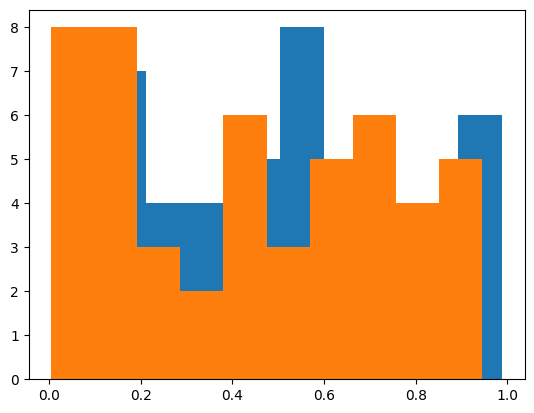

In [ ]:
plt.hist(initial_guesses[:, 0])
plt.hist(initial_guesses[:, 1])
plt.show()

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args = [x, y_new, y_err])
sampler.run_mcmc(initial_guesses, nsteps)

State([[1.47711814 2.45188552]
 [1.46765571 2.46197677]
 [1.43745884 2.49958188]
 [1.45895955 2.52913743]
 [1.58613388 2.36189671]
 [1.49888741 2.45848617]
 [1.49525927 2.46475748]
 [1.55339718 2.38893919]
 [1.51772058 2.42962753]
 [1.45531576 2.50356699]
 [1.46269279 2.50686277]
 [1.4590306  2.48616991]
 [1.47231466 2.47585832]
 [1.40707587 2.51390558]
 [1.44322644 2.58036301]
 [1.56003624 2.4205536 ]
 [1.48852824 2.46508072]
 [1.44065682 2.52194605]
 [1.57382107 2.3587104 ]
 [1.48811605 2.48423162]
 [1.52032848 2.41216238]
 [1.49492609 2.47959804]
 [1.46878042 2.49325233]
 [1.56407026 2.3878708 ]
 [1.62803085 2.35300539]
 [1.57338799 2.40353638]
 [1.5532409  2.42689296]
 [1.52052201 2.41945158]
 [1.46733941 2.46786213]
 [1.43908066 2.45407528]
 [1.49603804 2.41711637]
 [1.49788002 2.42031835]
 [1.55556805 2.43015033]
 [1.5873963  2.38539164]
 [1.39892163 2.56889423]
 [1.47409444 2.47586054]
 [1.37340038 2.54601082]
 [1.53022876 2.3756518 ]
 [1.53740976 2.36569164]
 [1.52782026 2.4018

In [ ]:
sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, 2)

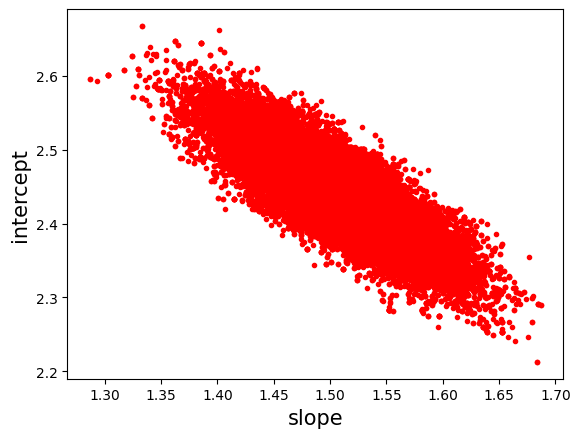

In [ ]:
plt.plot(sample[:, 0], sample[:, 1], '.', color = 'red')
plt.xlabel('slope', fontsize = 15)
plt.ylabel('intercept', fontsize = 15)
plt.show()

In [ ]:
sample.shape

(50000, 2)

In [ ]:
!pip install corner

In [ ]:
import corner

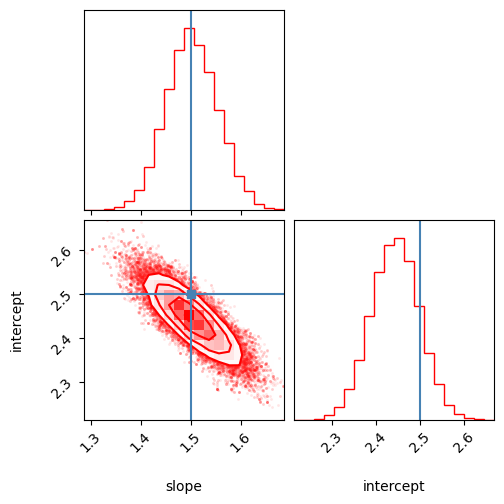

In [ ]:
fig = corner.corner(
    sample, labels = ['slope', 'intercept'], truths = [slope, intercept], color = 'red', lw = 2
)

In [ ]:
theta_MAP = sample.mean(0)
print(theta_MAP)

[1.5032219  2.44244495]


In [ ]:
from IPython.display import display, Math

In [ ]:
labels = ['slope', 'intercept']

for i in range(ndim):
    mcmc = np.percentile(sample[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0, 0.5, 'y')

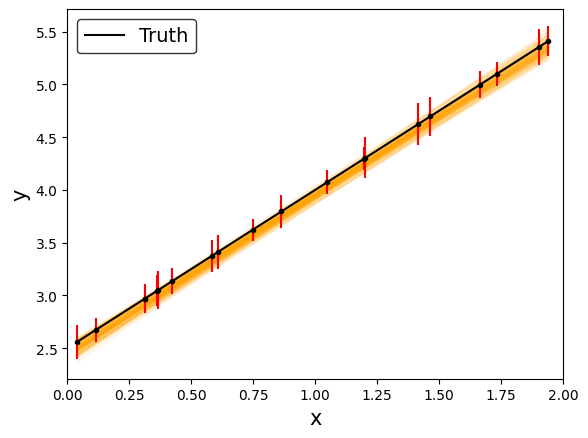

In [ ]:
inds = np.random.randint(len(sample), size = 100)

for ind in inds:
    s = sample[ind]
    plt.plot(x, np.dot(np.vander(x, 2), s[:2]), color = 'orange', alpha = 0.1)

plt.errorbar(x, y, yerr = y_err, linestyle = 'none' , marker = '.', color = 'k', ecolor = 'r')
plt.plot(x, slope * x + intercept, 'k', label = "Truth")
plt.legend(loc = 'best', edgecolor = 'k', fontsize = 14)
plt.xlim(0, 2)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)